## Minimos cuadrados ponderados

In [3]:
millaje <- read.csv("http://www.udec.cl/~jbustosm/millaje.csv",header=TRUE, sep=";")
#millaje<-read.table(file="c:/millaje.txt",header=T)
head(millaje)

mpg,sp,wt,vol,hp
65.4,96,17.5,89,49
56.0,97,20.0,92,55
55.9,97,20.0,92,55
49.0,105,20.0,92,70
46.5,96,20.0,92,53
46.2,105,20.0,89,70


In [4]:
#
#Extrayendo la primera y ultima observacion y consideramdo solo
#las columnas de variable de respuesta(1) y de wt(3).
#
millaje1<-millaje[-c(1,82),c(1,3)]

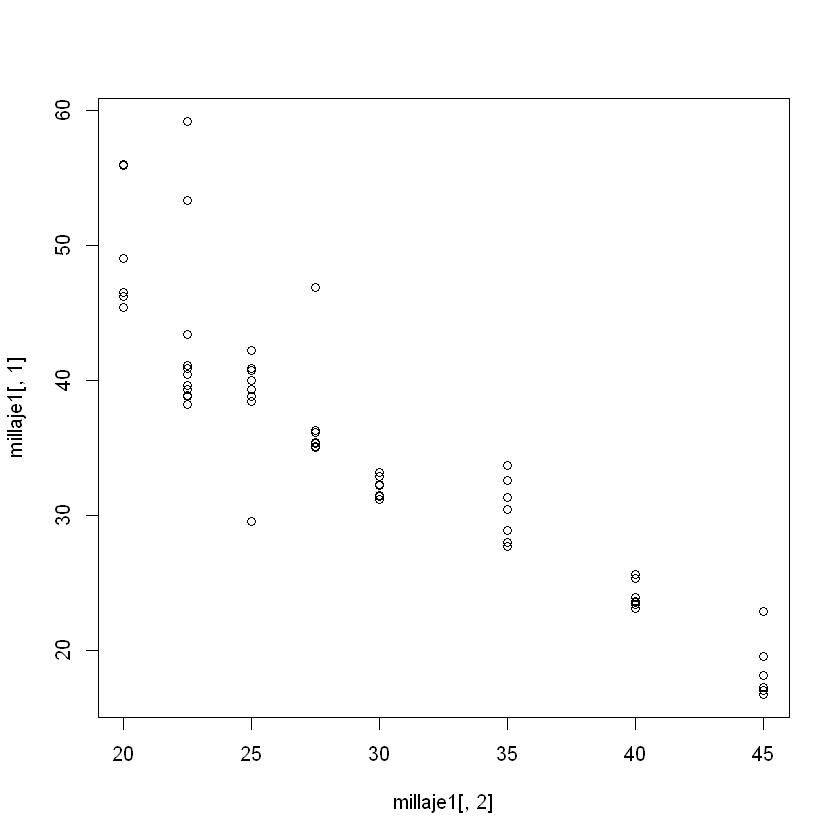

In [5]:

win.graph()
plot(millaje1[,2],millaje1[,1])

In [6]:

#Agrupando los valores de x
tabla<-table(millaje1[,2])
valsx<-dimnames(tabla)
valsx<-as.double(unlist(valsx))
nvalsx<-length(valsx)

In [7]:

#Calculando la varianza de cada grupo
varsg<-rep(0,nvalsx)
for(i in 1:nvalsx)
{grupox<-millaje1[millaje1[,2]==valsx[i],]
varsg[i]<-var(grupox[,1])
}
varsg

[1] 23.8986667 42.7533333 12.0048889 14.5586111  0.3960606  4.4626515  0.5972727
[8]  7.2947619

[1] 0.04184334 0.04184334 0.04184334 0.04184334 0.04184334 0.04184334
 [7] 0.02338999 0.02338999 0.02338999 0.02338999 0.02338999 0.02338999
[13] 0.02338999 0.02338999 0.02338999 0.02338999 0.02338999 0.02338999
[19] 0.08329940 0.08329940 0.08329940 0.08329940 0.08329940 0.08329940
[25] 0.08329940 0.08329940 0.08329940 0.08329940 0.06868787 0.06868787
[31] 0.06868787 0.06868787 0.06868787 0.06868787 0.06868787 0.06868787
[37] 0.06868787 2.52486611 2.52486611 2.52486611 2.52486611 2.52486611
[43] 2.52486611 2.52486611 2.52486611 2.52486611 2.52486611 2.52486611
[49] 2.52486611 0.22408203 0.22408203 0.22408203 0.22408203 0.22408203
[55] 0.22408203 0.22408203 0.22408203 0.22408203 0.22408203 0.22408203
[61] 0.22408203 1.67427702 1.67427702 1.67427702 1.67427702 1.67427702
[67] 1.67427702 1.67427702 1.67427702 1.67427702 1.67427702 1.67427702
[73] 1.67427702 0.13708467 0.13708467 0.13708467 0.13708467 0.13708467
[79] 0.13708467 0.13708467

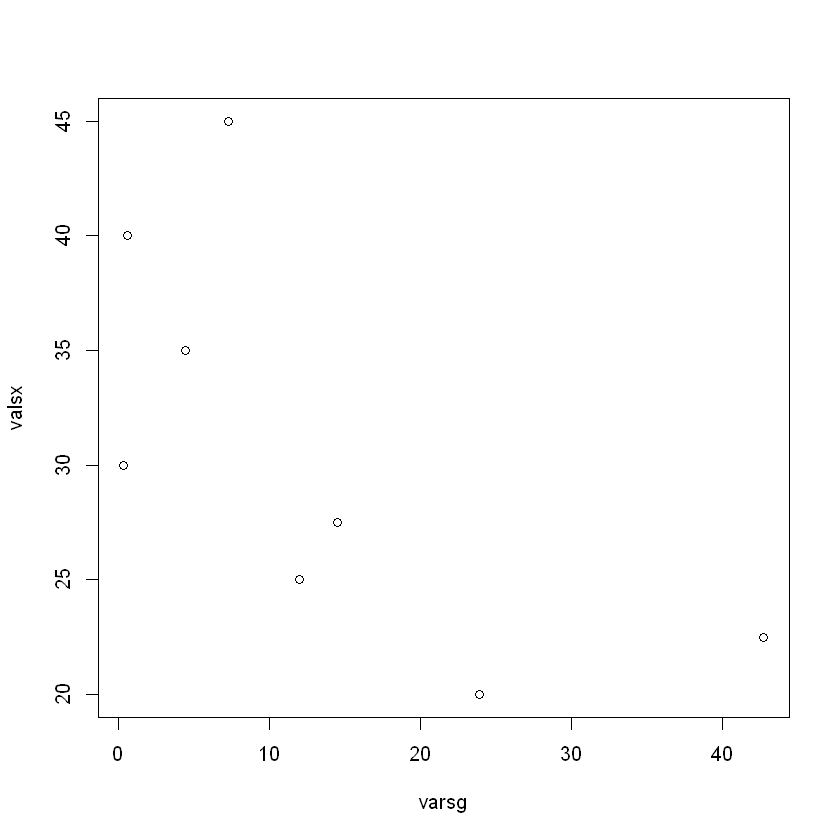

In [8]:

#Asignando los pesos a cada observacion (metodo I)
win.graph()
plot(varsg,valsx)
ndatos<-dim(millaje1)[1]
pesos<-rep(0,ndatos)
for(i in 1:ndatos)
{for(j in 1:nvalsx)
{if(millaje1[i,2]==valsx[j])
{pesos[i]<-1/varsg[j]}
}
}
pesos

In [9]:

#resultados de regresion sin ponderar
lw1<-lm(mpg~.,data=millaje1,weights=pesos)
summary(lw1)


Call:
lm(formula = mpg ~ ., data = millaje1, weights = pesos)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.1007 -0.1768  0.1953  1.0526  3.2224 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 58.51692    1.06539   54.92   <2e-16 ***
wt          -0.86954    0.03107  -27.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.206 on 78 degrees of freedom
Multiple R-squared:  0.9094,	Adjusted R-squared:  0.9083 
F-statistic: 783.4 on 1 and 78 DF,  p-value: < 2.2e-16


In [11]:

#Asignando los pesos a cada observacion (metodo II)
valsx2<-valsx^2
s2<-lm(varsg~valsx+valsx2)
s2
valsx<-millaje1[,2]
valsx2<-millaje1[,2]^2
nuevo<-data.frame(valsx,valsx2)
pesos1<-predict.lm(s2,nuevo)
pesos1<-1/pesos1
pesos1

ERROR: Error in model.frame.default(formula = varsg ~ valsx + valsx2, drop.unused.levels = TRUE): variable lengths differ (found for 'valsx')


In [12]:

#resultados de regresion ponderada
lw2<-lm(mpg~.,data=millaje1,weights=pesos1)
summary(lw2)


Call:
lm(formula = mpg ~ ., data = millaje1, weights = pesos1)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.3321 -0.7047 -0.3122  0.2965  3.4499 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 64.94848    1.72500   37.65   <2e-16 ***
wt          -1.02365    0.04738  -21.61   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.082 on 78 degrees of freedom
Multiple R-squared:  0.8568,	Adjusted R-squared:  0.855 
F-statistic: 466.8 on 1 and 78 DF,  p-value: < 2.2e-16


In [13]:
#************************************************
#Aplicando regresion ponderada con la variable sp
#************************************************
nclases<-nclass.scott(millaje[,2])
clases<-cut(millaje[,2],nclases)
millaje2<-cbind(millaje[,1],clases)

In [14]:
#Calculando la varianza de cada grupo
varsg2<-rep(0,nclases)
for(i in 1:nclases)
{grupox<-millaje2[millaje2[,2]==i,]
varsg2[i]<-var(grupox[,1])
}
varsg2

[1]  64.73444  32.17130  46.11350 123.24500  87.12000  21.12500  12.49000

[1] 0.015447727 0.015447727 0.015447727 0.031083601 0.015447727 0.031083601
 [7] 0.015447727 0.015447727 0.015447727 0.031083601 0.031083601 0.021685625
[13] 0.021685625 0.031083601 0.015447727 0.031083601 0.031083601 0.021685625
[19] 0.031083601 0.031083601 0.031083601 0.031083601 0.031083601 0.031083601
[25] 0.031083601 0.031083601 0.031083601 0.031083601 0.031083601 0.015447727
[31] 0.021685625 0.031083601 0.031083601 0.031083601 0.031083601 0.031083601
[37] 0.031083601 0.031083601 0.031083601 0.031083601 0.021685625 0.031083601
[43] 0.031083601 0.031083601 0.031083601 0.031083601 0.031083601 0.031083601
[49] 0.031083601 0.021685625 0.031083601 0.031083601 0.031083601 0.031083601
[55] 0.011478421 0.008113919 0.021685625 0.031083601 0.031083601 0.031083601
[61] 0.031083601 0.021685625 0.031083601 0.021685625 0.021685625 0.021685625
[67] 0.021685625 0.021685625 0.021685625 0.021685625 0.047337278 0.080064051
[73] 0.021685625 0.021685625 0.031083601 0.031083601 0.021685625 0.080064051
[79] 0.011478421 0.047337278 0.080064051 0.008113919

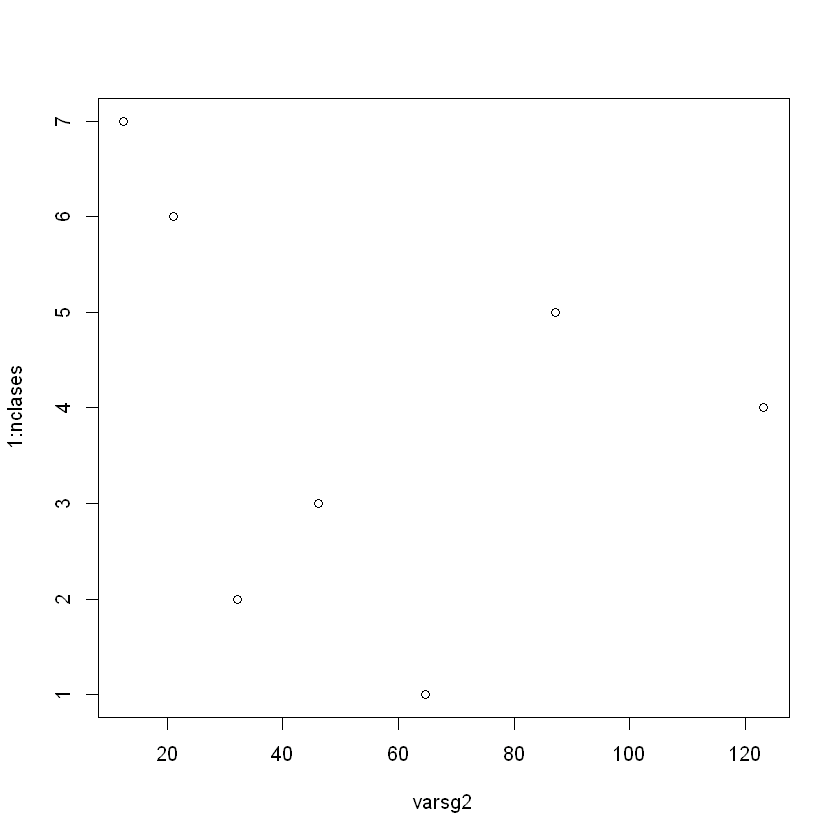

In [15]:


#Asignando los pesos a cada observacion 
win.graph()
plot(varsg2,1:nclases)
nd<-dim(millaje)[1]
pesos2<-rep(0,nd)
for(i in 1:nd)
{for(j in 1:nclases)
{if(millaje2[i,2]==j)
{pesos2[i]<-1/varsg2[j]}
}
}
pesos2

In [16]:

#Resultados usando regresion ponderada
lw3<-lm(mpg~sp,data=millaje[,c(1,2)],weights=pesos2)
summary(lw3)


Call:
lm(formula = mpg ~ sp, data = millaje[, c(1, 2)], weights = pesos2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-2.0462 -0.8219 -0.1663  0.6866  3.2091 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 74.37660    4.71501  15.774  < 2e-16 ***
sp          -0.36246    0.04022  -9.012 8.33e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.12 on 80 degrees of freedom
Multiple R-squared:  0.5038,	Adjusted R-squared:  0.4975 
F-statistic: 81.21 on 1 and 80 DF,  p-value: 8.334e-14


In [17]:

#Resultados sin usar regresion ponderada
lw4<-lm(mpg~sp,data=millaje)
summary(lw4)


Call:
lm(formula = mpg ~ sp, data = millaje)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.066  -4.961  -1.015   4.257  23.564 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 88.93774    6.54647   13.59  < 2e-16 ***
sp          -0.49065    0.05779   -8.49 8.84e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.301 on 80 degrees of freedom
Multiple R-squared:  0.474,	Adjusted R-squared:  0.4674 
F-statistic: 72.08 on 1 and 80 DF,  p-value: 8.837e-13
